AND with inputs 0 0 gives output 0


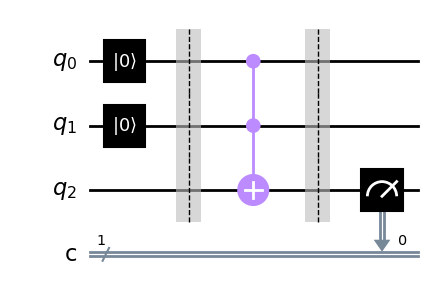



AND with inputs 0 1 gives output 0


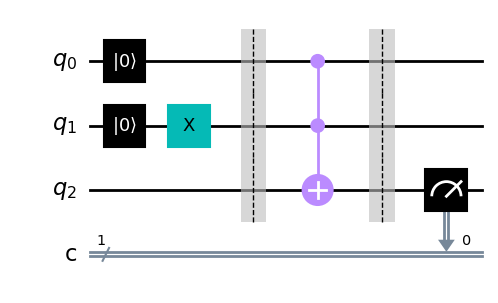



AND with inputs 1 0 gives output 0


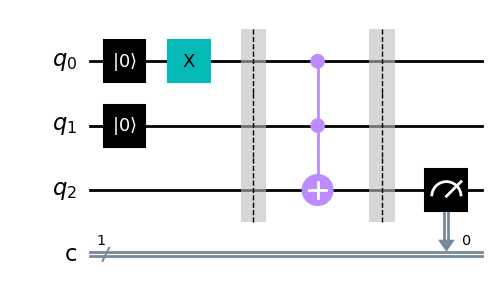



AND with inputs 1 1 gives output 1


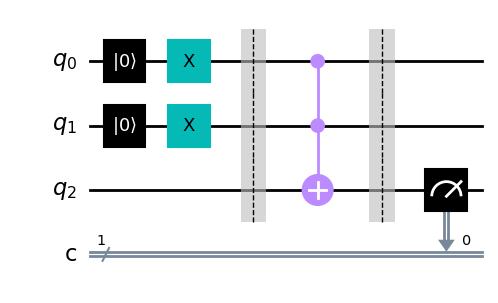

In [21]:
# Import Qiskit modules
from qiskit import *
from qiskit.tools.monitor import job_monitor
from qiskit.tools.visualization import plot_histogram

def AND(inp1,inp2):
    ''' A quantum AND circuit that takes two qubits as inputs and returns the corresponding circuit and output'''
    
    # Create the circuit
    qc = QuantumCircuit(3, 1) 
    qc.reset(range(2))

    # AND logic
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
        
    qc.barrier()
    qc.ccx(0,1,2)
    qc.barrier()
    
    
    qc.measure(2, 0) # output from qubit 2 is measured
    backend = Aer.get_backend('aer_simulator')
    job = backend.run(qc, shots=100, memory=True)
    output = job.result().get_memory()[0]
  
    return qc, output

# Create the quantum circuit
qc = QuantumCircuit(3, 1) 
qc.reset(range(2))

## Test the function
for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        qc, output = AND(inp1, inp2)
        print('AND with inputs',inp1,inp2,'gives output',output)
        display(qc.draw('mpl'))
        print('\n')
